#      <font color='15, 43, 90'>Prédiction de la valeur marchande des joueurs de football</font>  

## Introduction


La valeur marchande d'un joueur de football fait référence à l'estimation du montant auquel son club de football peut vendre ou transférer son contrat à un autre club. Depuis plusieurs années, nous assistons à un explosion de ces montants de transfert. Alors que dans les années 2000 les plus importants transferts étaient chiffrés en quelques dizaines de millions de dollars, les montants d'aujourd'hui sont bien plus importants, et on recense chaque année plusieurs transferts au dessus des 100 millions de dollars. Les clubs de football peuvent payer des sommes astronomiques pour obtenir les meilleurs joueurs, ainsi que la renommée, les contrats de publicité et la performance qui les accompagnent. Comme nous le verrons plus tard, la valeur marchande des joueurs de football suit une tendance exponentielle, ce qui indique qu'un petit sous-ensemble de joueurs a une valeur extrêmement élevée. Nous avons voulu nous intéresser à ce qui détermine ces montants astronomiques dans le monde du football moderne. Sont-ils liés uniquement aux performances sportives des joueurs, ou existent-ils d'autres facteurs explicatifs qui permettent de prédire leur valorisation ?  
  
   
  *Note préalable: nous n'avons pas joint tout le code de notre projet dans ce notebook, par souci de lisibilité et de longueur. Certaines parties ne peuvent donc pas s'exécuter, car elle sont dépendantes de segments de code que nous n'avons pas inclus. Cependant nous avons pris soin d'exécuter et d'afficher les graphiques et données importantes.*

## I) Récupération et traitement des données


Pour récupérer toutes les données nécessaires à la réalisation de ce projet, nous avons effectué du webscrapping sur le site **sofifa.com**, qui contient d'importantes bases de données sur les joueurs, leurs caractéristiques et leur valorisation.

Nous avons de travaillé sur un échantillon de plusieurs milliers de joueurs, choisis au hasard. La fonction pour récupérer les url des pages correspondant à ces joueurs sur le site est la suivante. C'est ensuite sur chacune de ces pages que nous récupérerons les variables qui nous intéressent.

In [19]:
import urllib
import bs4
import pandas as pd
import numpy as np
from urllib import request
import requests

In [3]:
def all_ref(n):
    L=[]
    for i in range(n):
        url='http://sofifa.com/players?offset=' + str(i*60)
        soup=soup_maker(url)
        table = soup.find('table', {'class': 'table-hover'})
        tbody = table.find('tbody', {'class': 'list'})
        col_name = tbody.find_all('tr')
        for col in col_name:
            col_ref = col.find('a')
            L.append(col_ref['href'])
    return ["http://sofifa.com" + L[i] for i in range(len(L))]

Nous avons ensuite codé 18 fonctions qui récupèrent chacune une caractéristique qui nous intéresse. Puis nous avons rassemblé toutes ces données dans un unique tableau. Nous avons retenu comme variables : 

-le nom du joueur  
-l'âge  
-le poids  
-la taille  
-sa note globale de niveau de jeu sur le site  
-son potentiel   
-sa valeur  
-son salaire  
-valeur de la clause de rupture  
-sa position  
-sa note d'attaque  
-sa note de défense  
-sa note technique  
-sa note de mouvement  
-sa puissance  
-son état d'esprit  
-sa note gardien  

Voici par exemple la fonction qui récupère la puissance du joueur:


In [4]:
def puissance(soup):
    skills=soup.findAll('div', {'class':'col col-12'})
    attacking=skills[1].findAll('ul', {'class':'pl'})[3]
    all=attacking.findAll('span',{'class': 'bp3-tag'})
    L=[int(all[k].text.strip()) for k in range(len(all))]
    return np.mean(L)

**Nous avons ensuite transféré toutes ces données dans une grande dataframe pandas, que nous exportons enfin dans excel.**

In [ ]:
df=pd.DataFrame({'url': all_ref(100)})

L=[[] for i in range(17)]

for url in df['url'].values:
    soup=soup_maker(url)
    L[0].append(name(soup))
    L[1].append(taille(soup))
    L[2].append(poids(soup))
    L[3].append(overall_rating(soup))
    L[4].append(potential(soup))
    L[5].append(wage(soup))
    L[6].append(value(soup))
    L[7].append(release_clause(soup))
    L[8].append(position(soup))
    L[9].append(attacking(soup))
    L[10].append(technique(soup))
    L[11].append(mouvement(soup))
    L[12].append(puissance(soup))
    L[13].append(defense(soup))
    L[14].append(gardien(soup))
    L[15].append(age(soup))
    L[16].append(etat_esprit(soup))

df['Nom']=L[0]
df['Taille']=L[1]
df['Age']=L[15]
df['Poids']=L[2]
df['Salaire']=L[5]
df['Valeur']=L[6]
df['Clause de rupture']=L[7]
df['Score total']=L[3]
df['Score pontentiel']=L[4]
df['Position']=L[8]
df['Attaque']=L[9]
df['Technique']=L[10]
df['Mouvement']=L[11]
df['Puissance']=L[12]
df['Defense']=L[13]
df['Gardien']=L[14]
df['Etat Esprit']=L[16]
#%%
# Exportation dans un excel
df.to_excel('Datasofifa.xlsx')

A ce stade, notre base de données ressemble à ceci :

In [20]:
df=pd.read_excel('Datasofifa.xlsx')
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.head(10)

,url,Nom,Taille,Age,Poids,Salaire,Valeur,Clause de rupture,Score total,Score pontentiel,Position,Attaque,Technique,Mouvement,Puissance,Defense,Gardien,Etat Esprit
0,http://sofifa.com/player/224158/sofyan-amrabat...,Sofyan Amrabat,183cm,25y.o.,70kg,€40K,€9M,€16M,76,79,CM,67.6,70.2,71.4,74.8,72.333333,12.0,70.666667
1,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Cristiano Ronaldo dos Santos Aveiro,187cm,37y.o.,83kg,€210K,€35M,€66.5M,89,89,ST,84.6,79.0,79.4,85.2,26.666667,11.6,74.333333
2,http://sofifa.com/player/255125/azzedine-ounah...,Azzedine Ounahi,182cm,22y.o.,62kg,€11K,€3.6M,€7.9M,70,81,CM,59.8,65.6,63.6,67.0,61.000000,9.6,60.666667
3,http://sofifa.com/player/209981/yassine-bounou...,Yassine Bounou,190cm,31y.o.,78kg,€34K,€22.5M,€47.3M,84,84,GK,19.0,21.4,45.4,47.2,17.666667,82.2,31.666667
4,http://sofifa.com/player/235410/youssef-en-nes...,Youssef En-Nesyri,188cm,25y.o.,78kg,€35K,€29.5M,€64.2M,80,84,ST,72.4,66.2,68.8,78.6,28.333333,11.6,64.166667
5,http://sofifa.com/player/268511/walid-cheddira...,Walid Cheddira,187cm,24y.o.,80kg,€3K,€2.2M,€3.9M,69,75,ST,63.8,57.2,67.4,68.6,38.666667,9.8,60.333333
6,http://sofifa.com/player/211381/sofiane-boufal...,Sofiane Boufal,175cm,28y.o.,67kg,€26K,€7.5M,€15M,76,76,CAM,66.4,75.2,79.8,58.2,31.666667,11.2,62.333333
7,http://sofifa.com/player/208670/hakim-ziyech/2...,Hakim Ziyech,181cm,29y.o.,65kg,€155K,€35.5M,€65.7M,83,83,RW,74.6,84.8,79.2,65.4,47.333333,10.2,73.166667
8,http://sofifa.com/player/241671/dominik-livako...,Dominik Livaković,187cm,27y.o.,79kg,€1K,€20.5M,€46.6M,80,83,GK,18.8,25.2,56.8,46.0,21.666667,78.2,32.833333
9,http://sofifa.com/player/158023/lionel-messi/2...,Lionel Andrés Messi Cuccittini,169cm,35y.o.,67kg,€195K,€54M,€99.9M,91,91,CAM,84.6,92.8,88.2,76.6,26.333333,10.8,73.666667


## Nettoyage des données

**Nous définissons ensuite une série de fonction qui vont permettent de nettoyer les données, et notamment de convertir les str en float ou int.**


In [ ]:

# %%
def convert_age(age):
    a=age.split('y')
    return int(a[0])

#%%
def convert_poids(poids):
    a=poids.split('k')
    return int(a[0])

#%%
def convert_taille(taille):
    a=taille.split('c')
    return int(a[0])

#%%
def convert_value(wage):
    a=wage.split('€')
    if len(a[1].split('K'))==2:
        b=a[1].split('K')
        return float(b[0])*1000
    elif len(a[1].split('M'))==2:
        b=a[1].split('M')
        return float(b[0])*1000000
    else:
        return float(a[1])

**Puis on applique ces fonctions à notre base, en plus de faire quelques changement supplémentaires pour qu'elle soit parfaitement exploitable.**
**On exporte à nouveau cette base, cette fois nettoyée, sous format excel.**


In [ ]:
df=pd.read_excel('Datasofifa.xlsx')
#%%
df=df.drop(columns=['Unnamed: 0'],axis=1)
#%%
df=df.dropna()
#%%
df=df.drop(df[df['Clause de rupture'] == 'Yes'].index)
df=df.drop(df[df['Clause de rupture'] == 'No'].index)
df=df.drop(df[df['Clause de rupture'] == 'N/A/ N/A'].index)

#%%
df=df.reset_index()
# %%
df['Valeur']=df['Valeur'].apply(convert_value)
df['Salaire']=df['Salaire'].apply(convert_value)
df['Clause de rupture']=df['Clause de rupture'].apply(convert_value)

#%%
df['Age']=df['Age'].apply(convert_age)
df['Taille']=df['Taille'].apply(convert_taille)
df['Poids']=df['Poids'].apply(convert_poids)
# %%
df['Poste gardien']=np.where(df['Position']=='GK','1','0')

##%%
df.to_excel('Datasofifa.xlsx')

Notre base de donnée ressemble désormais à ceci :

In [25]:
df=pd.read_excel("Datasofifaclean.xlsx")
df=df.drop(columns=['Unnamed: 0'],axis=1)
df=df.drop(columns=['index'],axis=1)
df.head(10)

,url,Nom,Taille,Age,Poids,Salaire,Valeur,Clause de rupture,Score total,Score pontentiel,Position,Attaque,Technique,Mouvement,Puissance,Defense,Gardien,Etat Esprit,Poste gardien
0,http://sofifa.com/player/224158/sofyan-amrabat...,Sofyan Amrabat,183,25,70,40000,9000000,16000000.0,76,79,CM,67.6,70.2,71.4,74.8,72.333333,12.0,70.666667,0
1,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Cristiano Ronaldo dos Santos Aveiro,187,37,83,210000,35000000,66500000.0,89,89,ST,84.6,79.0,79.4,85.2,26.666667,11.6,74.333333,0
2,http://sofifa.com/player/255125/azzedine-ounah...,Azzedine Ounahi,182,22,62,11000,3600000,7900000.0,70,81,CM,59.8,65.6,63.6,67.0,61.000000,9.6,60.666667,0
3,http://sofifa.com/player/209981/yassine-bounou...,Yassine Bounou,190,31,78,34000,22500000,47300000.0,84,84,GK,19.0,21.4,45.4,47.2,17.666667,82.2,31.666667,1
4,http://sofifa.com/player/235410/youssef-en-nes...,Youssef En-Nesyri,188,25,78,35000,29500000,64200000.0,80,84,ST,72.4,66.2,68.8,78.6,28.333333,11.6,64.166667,0
5,http://sofifa.com/player/268511/walid-cheddira...,Walid Cheddira,187,24,80,3000,2200000,3900000.0,69,75,ST,63.8,57.2,67.4,68.6,38.666667,9.8,60.333333,0
6,http://sofifa.com/player/211381/sofiane-boufal...,Sofiane Boufal,175,28,67,26000,7500000,15000000.0,76,76,CAM,66.4,75.2,79.8,58.2,31.666667,11.2,62.333333,0
7,http://sofifa.com/player/208670/hakim-ziyech/2...,Hakim Ziyech,181,29,65,155000,35500000,65700000.0,83,83,RW,74.6,84.8,79.2,65.4,47.333333,10.2,73.166667,0
8,http://sofifa.com/player/241671/dominik-livako...,Dominik Livaković,187,27,79,1000,20500000,46600000.0,80,83,GK,18.8,25.2,56.8,46.0,21.666667,78.2,32.833333,1
9,http://sofifa.com/player/158023/lionel-messi/2...,Lionel Andrés Messi Cuccittini,169,35,67,195000,54000000,99900000.0,91,91,CAM,84.6,92.8,88.2,76.6,26.333333,10.8,73.666667,0


## II) Analyse descriptive et représentation graphique

**Maintenant que notre base de donnée est prête, nous allons pouvoir effectuer des statistiques descriptives. On commence par importer les packages nécessaires et récupérer notre dataframe.**

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as  mpatches

**On effectue tout d'abord un classique df.describe() pour avoir un aperçu générale de nos données.**


In [27]:
df.describe()

,Taille,Age,Poids,Salaire,Valeur,Clause de rupture,Score total,Score pontentiel,Attaque,Technique,Mouvement,Puissance,Defense,Gardien,Etat Esprit,Poste gardien
count,5232.000000,5232.000000,5232.000000,5232.000000,5.232000e+03,5.232000e+03,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000
mean,181.406537,24.325688,74.930237,19133.648700,7.009862e+06,1.346117e+07,69.905581,75.790329,54.912385,57.394381,67.732148,62.797592,50.118438,14.665214,56.763093,0.075497
std,7.021886,4.510296,7.226641,32401.854435,1.308569e+07,2.527138e+07,7.229918,5.926508,14.301419,14.974522,10.732022,9.922259,21.073219,15.716175,12.087853,0.264217
min,158.000000,16.000000,49.000000,500.000000,9.000000e+03,1.200000e+04,45.000000,52.000000,9.600000,9.600000,26.400000,26.600000,7.666667,2.400000,15.500000,0.000000
25%,176.000000,21.000000,70.000000,2000.000000,1.100000e+06,2.000000e+06,65.000000,72.000000,49.400000,51.000000,62.600000,56.600000,31.000000,9.400000,51.333333,0.000000
50%,181.000000,24.000000,75.000000,7000.000000,2.300000e+06,4.400000e+06,70.000000,76.000000,57.200000,59.600000,69.600000,63.800000,56.333333,10.400000,58.166667,0.000000
75%,186.000000,27.000000,80.000000,22000.000000,6.500000e+06,1.210000e+07,75.000000,80.000000,64.200000,67.400000,75.000000,70.200000,68.000000,11.600000,64.833333,0.000000
max,206.000000,44.000000,105.000000,450000.000000,1.905000e+08,3.667000e+08,91.000000,95.000000,86.800000,92.800000,92.200000,86.400000,89.333333,88.800000,83.333333,1.000000


On remarque que l'âge moyen des joueurs de foot de notre Dataframe est d'environ 24 ans, avec un écart-type égal à 4. Les joueurs de foot sont donc en moyenne très jeunes, en dessous de 30 ans. Par ailleurs, la taille moyenne des joueurs de notre échantillon est 1m81, ce qui est bien plus élevé que la moyenne française, située aux alentours de 1m75. Les joueurs de foot sont donc relativement grands.

On observe également que le salaire s'étend de 500€ à 450000€. De même les clauses de rupture vont de 12 000€ à 366 700 000€. Les valeurs sont donc très éparses.

Quant aux statistiques de jeu, la plupart d'entres elles ont des écarts-types assez élevés : de l'ordre de 15. Cela est notamment dû au fait que les gardiens sont notés de la même façon que les autres joueurs : un gardien aura effectivement des statistiques de défense ou d'attaque inférieures à celles d'un attaquant ou d'un défenseur. C'est pour cette raison que nous avons ajouté la variable "Poste gardien" qui vaut 1 si le joueur a un poste de gardien, 0 sinon. Ainsi, on remarque que seulement 7% des joueurs de notre échantillon sont des gardiens.

**On standardise ensuite les variables numérique de notre dataframe, pour améliorer la qualité de nos données et faciliter la représentation graphique. Voici nos fonctions de standardisation.**

In [28]:
col_modele=["Age","Taille","Salaire","Valeur","Score total","Attaque","Technique","Mouvement","Puissance","Defense","Gardien","Etat Esprit"]
df2=df[col_modele]
features = df[col_modele]
features = StandardScaler().fit(features.values).transform(features.values)
df2[col_modele] = features

c:\Users\gille\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Nous traçons ensuite quelques distributions de ces variables standardisées.

c:\Users\gille\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
c:\Users\gille\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\gille\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.n

[Text(0.5, 1.0, 'Salaire standardisé')]

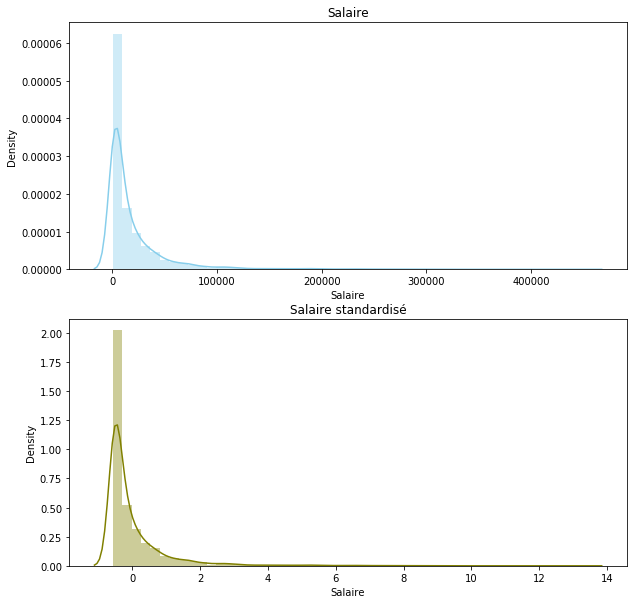

In [29]:
#Variable salaire

f, axes = plt.subplots(2, figsize=(10, 10))

sns.distplot(df["Salaire"] , color="skyblue", ax=axes[0]).set(title='Salaire')

sns.distplot(df2["Salaire"] , color="olive", ax=axes[1]).set(title='Salaire standardisé')

Le salaire présente un fort pic un peu en dessous de la moyenne et de nombreuses valeurs extrêmes. C'est ce que nous imaginions : il existe un groupe de joueurs restreint dont le salaire est exponentiellement grand en comparaison du joueur moyen.

c:\Users\gille\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\Users\gille\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\gille\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newa

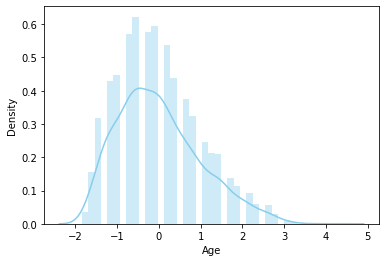

In [27]:
# Variable age
sns.distplot(df2["Age"] , color="skyblue")

La distribution de l'âge est plutôt symétrique autour de la moyenne avec peu de valeurs extrêmes : les joueurs de foot sont relativement tous jeunes.

c:\Users\gille\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\Users\gille\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\gille\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newa

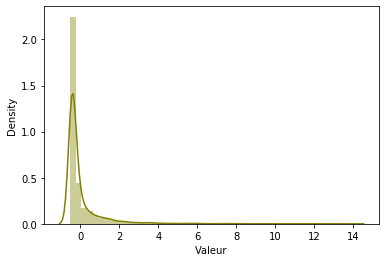

In [25]:
#Valeur marchande des joueurs
sns.distplot(df2["Valeur"] , color="olive")


Comme pour le salaire, la valeur des joueurs présente un pic important autour de la moyenne puis un grand nombre de valeurs extrêmes vers la droite.

**On trace maintenant le graphique de la densité du score totale et du salaire**

c:\Users\gille\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.
c:\Users\gille\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until


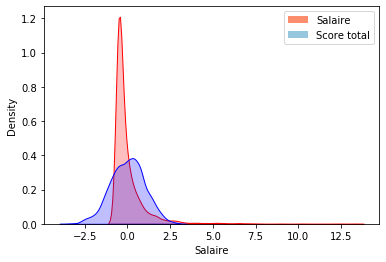

In [30]:
fig = sns.kdeplot(df2['Salaire'], shade=True, color="r")

fig = sns.kdeplot(df2['Score total'], shade=True, color="b")

handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Salaire"),

           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Score total")]

plt.legend(handles=handles)

plt.show()

On remarque que la variable score total est beaucoup plus étalée et applatie que le salaire. La variable salaire présente notamment un étalement de sa distribution vers la gauche.

Afin de mesurer ces tendances nous pouvons calculer les coefficients d'asymétrie (skewness) et d'aplatissement (kurtosis).

In [32]:
from scipy.stats import skew
from scipy.stats import kurtosis

print("Le coefficient d'asymétrie de la variable score est", round(skew(df2['Score total']),4))
print("Le coefficient d'asymétrie de la variable salaire est", round(skew(df2['Salaire']),4))

print("Le coefficient d'aplatissement de la variable score est", round(kurtosis(df2['Score total']),4))
print("Le coefficient d'aplatissement de la variable salaire est", round(kurtosis(df2['Salaire']),4))

Le coefficient d'asymétrie de la variable score est -0.0865
Le coefficient d'asymétrie de la variable salaire est 4.1598
Le coefficient d'aplatissement de la variable score est -0.1184
Le coefficient d'aplatissement de la variable salaire est 26.4433


Le coefficient d'*asymétrie* du **score** est négatif et proche de 1 en valeur absolue : cela signifie que sa distribution est légèrement étalée à gauche.

Le coefficient d'*asymétrie* du **salaire** est positif et plus grand que 1 : cela signifie que sa distribution est très étalée vers la droite.


Le coefficient d'*aplatissement* du **salaire** est positif et très grand devant 1 : cela signifie que sa distribution présente un pic moins plat.

Le coefficient d'*aplatissement* du **score** est négatif : cela signifie que sa distribution est plus plate.

  
  


  **Enfin, on crée la fondamentale matrice de corrélation entre les variables.**
  


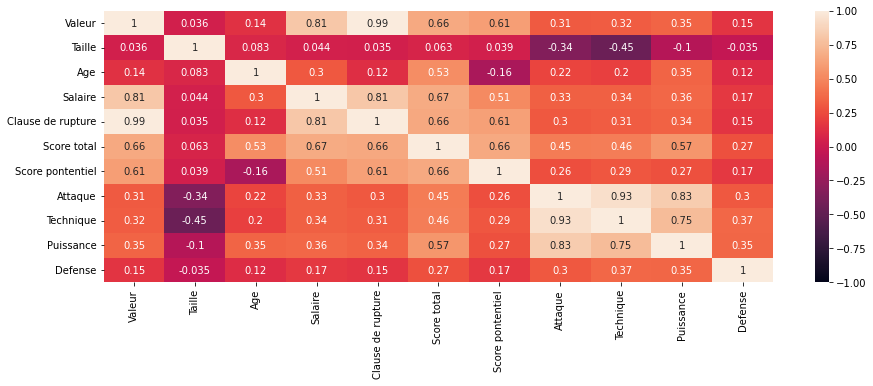

In [41]:
# Corrélation des variables

variable_corr=['Valeur','Taille','Age','Salaire','Clause de rupture',

'Score total','Score pontentiel','Attaque','Technique','Puissance','Defense']

df_corr=df[variable_corr]

#%%

matrice_corr = df_corr.corr()
plt.figure(figsize=(15,5))

heatmap = sns.heatmap(matrice_corr, vmin=-1, vmax=1, annot=True)

On remarque que la valeur d'un joueur est fortement corrélée à son salaire et son score total (corrélation de 0.81 et 0.66). De même, le salaire d'un joueur est fortement corrélé avec son score total (corrélation de 0.67). Les valeurs marchandes des joueurs semblent donc dépendre fortement des statistiques de jeu du joueur.

Par ailleurs, les statistiques telles que l'attaque, la technique et la puissance sont fortement corrélées: un joueur ayant une bonne technique aura une bonne attaque mais possède également de la puissance.

**On remarque que la corrélation entre la variable "clause de rupture" et la variable "valeur" est quasiment égale à 1: dans la suite de notre projet nous ne nous intéressons donc plus à la variable "clause de rupture" pour prédire la valeur.**

**On trace maintenant les différentes fonctions de la variable "valeur" en fonction des variables explicatives.**

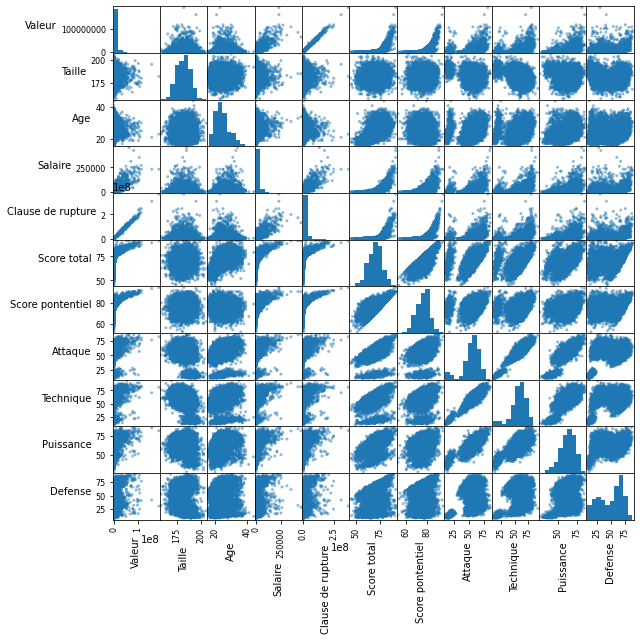

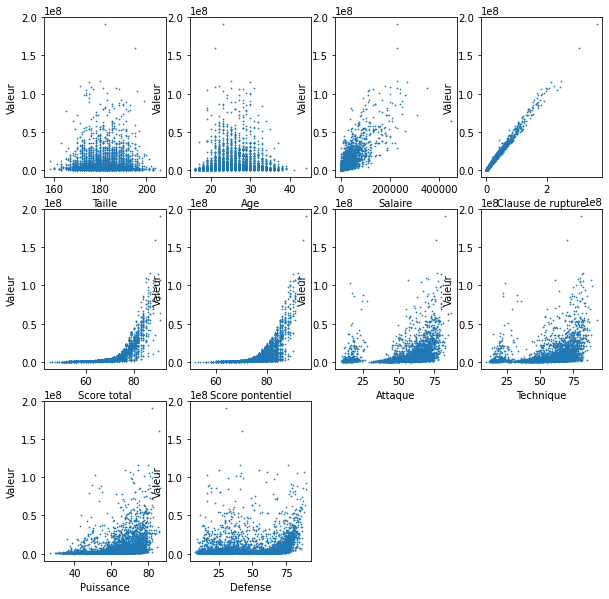

In [51]:
#%%

axes=pd.plotting.scatter_matrix(df_corr, figsize=(9,9))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


#%%

# Subplot valeur en fonction des autres variables

plt.figure(figsize=(10,10))

for i in range(1,11):
    
    plt.subplot(3,4,i)

    plt.scatter(df[variable_corr[i]],df['Valeur'],s=0.5)

    plt.xlabel(variable_corr[i])

    plt.ylabel("Valeur")
# %%


## III) Régression linéaire simple

Dans cette partie, nous allons effectuer une régression linéaire afin de prédire la valeur marchande des joueurs.

Pour cela, nous installons dans un premier temps les packages nécessaires :

Rappel : on a déjà standardisé nos données dans la partie II

On sépare nos données en un échantillon de test et un échantillon d'apprentissage :

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df2.drop(["Valeur"], axis = 1),
    100*df2[['Valeur']].values.ravel(), test_size=0.2, random_state=0
)

On effectue la régression linéaire de la variable valeur sur les variables explicatives de notre modèle, pour notre échantillon d'appprentissage :

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

On évalue notre modèle :

In [33]:
print("Le R² de l'échantillon d'apprentissage est",round(model.score(X_train,y_train),4))
print("Le R² de l'échantillon de test est",round(model.score(X_test,y_test),4))

Le R² de l'échantillon d'apprentissage est 0.7271
Le R² de l'échantillon de test est 0.724


On représente la valeur du joueur prédite en fonction de sa véritable valeur sur l'échantillon test :

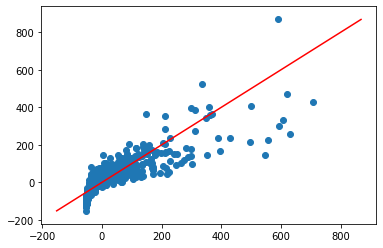

In [38]:
predictions=model.predict(X_test)
x=range(int(min(predictions)),int(max(predictions)))

plt.plot(x,x,c='r')
plt.scatter(y_test,predictions)

Nos variables sélectionnées semblent bien prédire la valeur marchande des joueurs.

In [39]:
pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("L'erreur quadrataique moyenne sur l'échantillon d'apprentissage est",round(mse_train, 2))

pred = model.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print("L'erreur quadrataique moyenne sur l'échantillon de test est",round(mse_test, 2))

L'erreur quadrataique moyenne sur l'échantillon d'apprentissage est 2820.65
L'erreur quadrataique moyenne sur l'échantillon de test est 2388.96


Nous pouvons maintenant nous intéresser aux coefficients des différentes variables explicatives grâce au package statsmodel.

In [40]:
import statsmodels.api as sm

In [41]:
X_train_cst = sm.add_constant(X_train)

model= sm.OLS(y_train,X_train_cst)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1011.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:42:08   Log-Likelihood:                -22563.
No. Observations:                4185   AIC:                         4.515e+04
Df Residuals:                    4173   BIC:                         4.523e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2109      0.822      0.256      

On remarque que les variables taille, attaque, technique, puissance et gardien ne sont pas significatives statistiquement ni au seuil de 1%, ni de 5%, ni de 10%.

Comme constaté avec l'étude de la matrice de corrélation, notre régression linéaire montre que les variables Salaire et Score total sont les plus significative pour prédire la valeur marchande du joueur.

Remarque : nous aimerions nous assurer que nous avons bien fait d'ignorer la variable Clause de rupture dans notre régression linéaire. Pour cela, nous effectuons une nouvelle régression linéaire, en prenant en compte la variable Clause de rupture.

On crée un nouveau dataframe, avec cette fois-ci la variable Clause de rupture. On standardise toutes les variables.

In [14]:
col_modele_cr=["Age","Taille","Clause de rupture","Salaire","Valeur","Score total","Attaque","Technique","Mouvement","Puissance","Defense","Gardien","Etat Esprit"]
df3=df[col_modele_cr]
features = df[col_modele_cr]
features = StandardScaler().fit(features.values).transform(features.values)
df3[col_modele_cr] = features

c:\Users\gille\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


On sépare nos données en un échantillon de test et un échantillon d'apprentissage :

In [15]:
X_train_cr, X_test_cr, y_train_cr, y_test_cr = train_test_split(
    df3.drop(["Valeur"], axis = 1),
    100*df3[['Valeur']].values.ravel(), test_size=0.2, random_state=0
)

On effectue la régression linéaire de Valeur sur les autres variables explicatives :

In [17]:
X_train_cr=sm.add_constant(X_train_cr)

model= sm.OLS(y_train_cr,X_train_cr)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.355e+04
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:40:17   Log-Likelihood:                -15697.
No. Observations:                4185   AIC:                         3.142e+04
Df Residuals:                    4172   BIC:                         3.150e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0725      0.15

On remarque qu'en incluant la variable Clause de rupture, le R² vaut 0.99. Le coefficient de Clause de rupture vaut 98 et a une p-valeur égale à 0, il est donc significatif au seuil de 1%. A elle seule, la variable Clause de rupture explique la Valeur du joueur. Il n'y a donc pas d'intéret à l'introduire dans le modèle. 

Notre hypothèse est donc justifiée.

## IV) Régression Lasso

Dans cette partie, nous allons nous intéresser à la régression Lasso. Elle repose également sur le modèle de régression linéaire mais elle effectue une régularisation dite L1, qui est un processus d'introduction d'informations supplémentaires afin d'éviter l'*overfitting*.
Ainsi, on peut ajuster un modèle contenant toutes les variables explicatives possibles et utiliser le lasso pour effectuer une sélection de variables. On utilise une technique qui régularise les estimations de coefficient (elle rétrécit les estimations de coefficient vers zéro).

On installe les packages nécessaires :

In [36]:
import sklearn.metrics

from sklearn.linear_model import Lasso 
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV

Rappel : on a déjà standardisé nos données dans la partie II

## 1) Première régression Lasso

On effectue une première régression Lasso pour $\alpha$ = 0.1:

In [40]:
lasso1 = Lasso(fit_intercept=True,normalize=False, alpha = 0.1)
lasso1.fit(X_train,y_train)

c:\Users\gille\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Lasso(alpha=0.1, normalize=False)

In [41]:
features_selec = df2.select_dtypes(include=np.number).drop("Valeur", axis = 1).columns[np.abs(lasso1.coef_)>0].tolist()
print('Les variables retenues par la régression Lasso sont :', ','.join(features_selec))

Les variables retenues par la régression Lasso sont : Age,Taille,Salaire,Score total,Attaque,Technique,Mouvement,Puissance,Defense,Gardien,Etat Esprit


On évalue notre modèle :

In [42]:
print("Le R² de l'échantillon d'apprentissage est", round(lasso1.score(X_train, y_train),4))
print("Le R² de l'échantillon de test est", round(lasso1.score(X_test, y_test),4))

Le R² de l'échantillon d'apprentissage est 0.727
Le R² de l'échantillon de test est 0.7235


In [43]:
pred_train = lasso1.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("L'erreur quadrataique moyenne sur l'échantillon d'apprentissage est",round(mse_train, 2))

pred = lasso1.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print("L'erreur quadrataique moyenne sur l'échantillon de test est",round(mse_test, 2))


L'erreur quadrataique moyenne sur l'échantillon d'apprentissage est 2821.43
L'erreur quadrataique moyenne sur l'échantillon de test est 2393.04


## 2) Régression Lasso pour différentes valeurs de $\alpha$

On effectue des régressions Lasso pour différentes valeurs de $\alpha$.

In [44]:
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])
alpha_for_path, coefs_lasso, _ = lasso_path(X_train,y_train,alphas=my_alphas)
nb_non_zero = np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso,axis=0)

On recense le nombre de variables retenues à l'aide des régressions Lasso pour différentes valeurs de $\alpha$.

Text(0.5, 1.0, 'Nombre de variables retenues fonction de alpha')

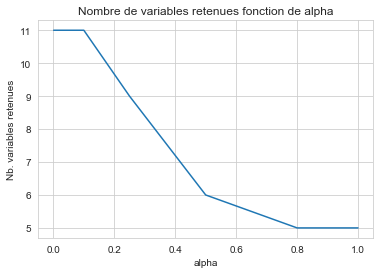

In [45]:
sns.set_style("whitegrid")
ax = plt.gca()

ax.plot(alpha_for_path, nb_non_zero)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Nb. variables retenues')
plt.title("Nombre de variables retenues fonction de alpha")

Plus la pénalisation est élevée (ie : $\alpha$ est élevé), moins le modèle retient de variable.

On calcule l'erreur quadratique moyenne (notée MSE) pour les régressions avec différentes valeurs de $\alpha$, sur l'échantillon d'apprentissage et sur l'échantillon de test.

In [46]:
mse_train=[]
mse_test=[]
lasso = Lasso(max_iter=10000)
for a in my_alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    mse_test.append(mean_squared_error(y_test, pred))
    pred_train = lasso.predict(X_train)
    mse_train.append(mean_squared_error(y_train, pred_train))

Text(0.5, 1.0, "MSE de l'échantillon d'apprentissage fonction de alpha")

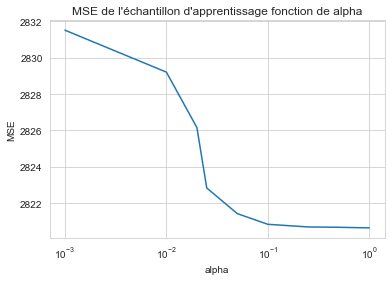

In [47]:
sns.set_style("whitegrid")
ax = plt.gca()

ax.plot(alpha_for_path, mse_train)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title("MSE de l'échantillon d'apprentissage fonction de alpha")

Text(0.5, 1.0, "MSE de l'échantillon de test fonction de alpha")

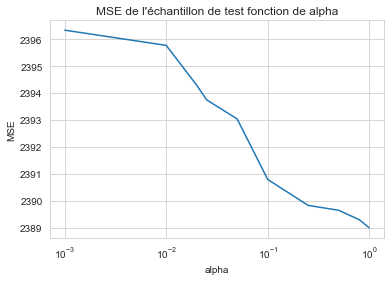

In [48]:
sns.set_style("whitegrid")
ax = plt.gca()

ax.plot(alpha_for_path, mse_test)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title("MSE de l'échantillon de test fonction de alpha")

Sur l'échantillon de test comme sur l'échantillon d'apprentissage, on observe que plus la pénalisation est forte, moins l'erreur quadratique est elévée.

## 3) Détermination de la valeur de $\alpha$ optimal

Afin de trouver la valeur optimale d'alpha, nous utilisons le package `scikit` et LassoCV qui déterminent un modèle linéaire Lasso avec ajustement itératif le long d'un chemin de régularisation. Le meilleur modèle est sélectionné par validation croisée.

On réalise une validation croisée en 5 blocs.

In [49]:
model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [50]:
print("La meilleure valeur de pénanlisation pour alpha avec validation croisée est", round(model.alpha_,4))

La meilleure valeur de pénanlisation pour alpha avec validation croisée est 0.221


Traçons, pour chaque groupe de validation, l'erreur quadratique moyenne en fonction de la valeur de $\alpha$.

(0.05891441386030578,
 117.5497097839483,
 1753.8075217257128,
 14463.008618768756)

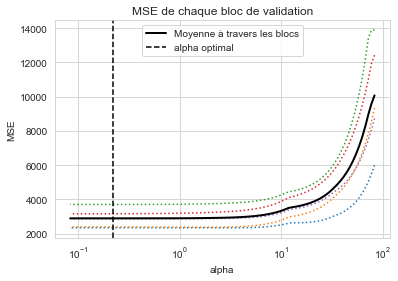

In [51]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Moyenne à travers les blocs",
    linewidth=2,
)

plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha optimal"
)

plt.legend()
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("MSE de chaque bloc de validation")
plt.axis("tight")

On remarque que la valeur de $\alpha$ optimal 0.221 permet de minimiser l'erreur quadratique moyenne.

On utilise la meilleure valeur de $\alpha$ trouvée pour notre modèle final.

In [52]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.221036495089735)

In [53]:
features_selec2 = df2.select_dtypes(include=np.number).drop("Valeur", axis = 1).columns[np.abs(lasso_best.coef_)>0].tolist()
print('Les variables retenues par la régression Lasso sont :', ','.join(features_selec2))

Les variables retenues par la régression Lasso sont : Age,Taille,Salaire,Score total,Technique,Mouvement,Puissance,Defense,Gardien


On remarque que cette fois, la variable *Etat d'esprit* n'a pas été retenu.

Evaluation du modèle avec ce alpha optimal :

In [55]:
print("Le R² de l'échantillon d'apprentissage est", round(lasso_best.score(X_train, y_train),4))
print("Le R² de l'échantillon de test est", round(lasso_best.score(X_test, y_test),4))

Le R² de l'échantillon d'apprentissage est 0.7269
Le R² de l'échantillon de test est 0.7234


On obtient approximativement les mêmes valeurs de R² qu'avec un $\alpha$ = 0.1

In [56]:
pred_train = lasso_best.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("L'erreur quadrataique moyenne sur l'échantillon d'apprentissage est",round(mse_train, 2))

pred = lasso_best.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print("L'erreur quadrataique moyenne sur l'échantillon de test est",round(mse_test, 2))

L'erreur quadrataique moyenne sur l'échantillon d'apprentissage est 2822.58
L'erreur quadrataique moyenne sur l'échantillon de test est 2393.84


De même, l'erreur quadratique est sensiblement la même qu'avec $\alpha$ = 0.1

# Conclusion

Ainsi, afin de prédire la valeur marchande d'un joueur de football, les variables pertinentes à retenir sont : l'Age, la Taille, le Salaire, le Score total, Technique, Mouvement, Puissance, Defense et Gardien.

Utiliser une régression linéaire nous permet d'avoir des résultats satisfaisants : les variables sont statistiquement significatives et le R² vaut environ 0.7.

En vu d'améliorer le modèle, nous pourrions inclure les positions des joueurs dans les régressions en les vectorisant.